In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("CrimeConnected.csv")

/home/marija/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,10,11,13,14,15,17,18,19,20,21,22,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [65]:
CrimeType=df['CrimeType']
uniqueTypes = CrimeType.unique().tolist()
uniqueTypes = [x.lower() for x in uniqueTypes]
print(len(uniqueTypes))

175


In [66]:
CrimeType.value_counts()[:40]

Murder or Manslaughter:Yes         439444
larceny/theft                      268292
theft                              206732
all other offenses                 205465
Murder or Manslaughter:No          189894
battery                            188251
assault                            153630
other offenses                     136672
narcotics                          132399
non-criminal                       128649
criminal damage                    126521
thefts                             125082
other assaults                     123269
burglary                           120946
traffic accident                   120189
vandalism/criminal mischief         97158
all other crimes                    82485
theft from vehicle                  79497
fraud                               73982
robbery                             73016
larceny                             72233
vandalism                           71219
motor vehicle theft                 68351
narcotic / drug law violations    

In [67]:
VehicleTheft=[] #keep
for i in uniqueTypes:
    if (('vehicle' in i or 'auto' in i) and 'accident' not in i and 'from' not in i):
        if i not in VehicleTheft:
            VehicleTheft.append(i)
for i in VehicleTheft:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
VehicleTheft

169


['auto theft',
 'auto theft recovery',
 'motor vehicle theft',
 'recovered stolen motor vehicle',
 'vehicle theft',
 'recovered vehicle']

In [68]:
robbery=[] #robbery, burglary  #keep
for i in uniqueTypes:
    if ('robbery' in i or 'burglary' in i or 'theft' in i or 'larceny' in i or 'hijacking' in i):
        if i not in robbery:
            robbery.append(i)
for i in robbery:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
robbery

151


['larceny',
 'robbery',
 'larceny from motor vehicle',
 'residential burglary',
 'other burglary',
 'commercial burglary',
 'burglary - no property taken',
 'theft',
 'burglary',
 'theft from motor vehicle',
 'thefts',
 'burglary non-residential',
 'theft from vehicle',
 'robbery no firearm',
 'robbery firearm',
 'burglary residential',
 'larceny/theft',
 'hijacking']

In [69]:
drug=[]#nacrotic, drug #remove
for i in uniqueTypes:
    if ('nacortic' in i or 'drug' in i or 'narcotic' in i or 'liquor' in i or 'influence' in i or 'drunk' in i) :
        if i not in drug:
            drug.append(i)     
for i in drug:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
drug

137


['drug violation',
 'liquor violation',
 'operating under the influence',
 'narcotics',
 'liquor law violation',
 'other narcotic violation',
 'drug & alcohol',
 'driving under the influence',
 'narcotic / drug law violations',
 'liquor law violations',
 'public drunkenness',
 'drug/narcotic',
 'liquor laws',
 'drunkenness']

In [70]:
fraud=[]#fraud #keep
for i in uniqueTypes:
    if ('fraud' in i or 'deceptive' in i or 'counterfeit' in i or 'bad checks' in i or 'games' in i or 'embezzlement' in i or 'collar' in i) :
        if i not in fraud:
            fraud.append(i)
for i in fraud:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
fraud

128


['fraud',
 'counterfeiting',
 'confidence games',
 'embezzlement',
 'deceptive practice',
 'white collar crime',
 'forgery and counterfeiting',
 'forgery/counterfeiting',
 'bad checks']

In [71]:
sexual=[]#sexual #keep
for i in uniqueTypes:
    if ('sex' in i or 'battery' in i or 'rape' in i) :
        if i not in sexual:
            sexual.append(i)
for i in sexual:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
sexual

120


['battery',
 'crim sexual assault',
 'sex offense',
 'sexual assault',
 'rape',
 'other sex offenses (not commercialized)',
 'sex offenses, forcible',
 'sex offenses, non forcible']

In [72]:
warrant=[]#warrant #remove
for i in uniqueTypes:
    if ('warrant' in i) :
        if i not in warrant:
            warrant.append(i)
for i in warrant:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
warrant

117


['warrant arrests', 'search warrants', 'warrants']

In [73]:
missing=[]#missing #keep
for i in uniqueTypes:
    if ('missing' in i or 'runaway' in i) :
        if i not in missing:
            missing.append(i)
for i in missing:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
missing

113


['missing person reported',
 'missing person located',
 'missing person',
 'runaway']

In [74]:
accident=[]   #remove
for i in uniqueTypes:
    if('accident' in i):
        if i not in accident:
            accident.append(i)
for i in accident:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
accident


111


['motor vehicle accident response', 'traffic accident']

In [75]:
weapon=[]   #remove
for i in uniqueTypes:
    if('weapon' in i):
        if i not in weapon:
            weapon.append(i)
for i in weapon:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
weapon

108


['weapons violation', 'weapon violations', 'weapon laws']

In [76]:
prostitution=[]   #keep
for i in uniqueTypes:
    if('prostitution' in i):
        if i not in prostitution:
            prostitution.append(i)
for i in prostitution:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
prostitution


106


['prostitution', 'prostitution and commercialized vice']

In [77]:
murder=[] # murder or manslaughter  #keep
for i in uniqueTypes:
    if ('murder' in i or 'manslaughter' in i or 'homicide' in i or 'assassination' in i) :
        if i not in murder:
            murder.append(i)
for i in murder:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
murder

96


['homicide',
 'manslaughter',
 'murder',
 'homicide - criminal',
 'homicide - gross negligence',
 'assassination',
 'murder or manslaughter:yes',
 'murder or manslaughter:no',
 'manslaughter by negligence:yes',
 'manslaughter by negligence:no']

In [78]:
propertyl=[] #property  #keep
for i in uniqueTypes:
    if('property' in i or 'home' in i):
        if i not in propertyl:
            propertyl.append(i)
for i in propertyl:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
propertyl

88


['investigate property',
 'property lost',
 'property found',
 'property related damage',
 'home invasion',
 'recovered stolen property',
 'receiving stolen property',
 'stolen property']

In [79]:
vandalism=[]#vandalism #keep
for i in uniqueTypes:
    if ('vandalism' in i or 'damage' in i or 'facility' in i) :
        if i not in vandalism:
            vandalism.append(i)
for i in vandalism:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
vandalism

84


['vandalism',
 'criminal damage',
 'vandalism/criminal mischief',
 'facility/infrastructure attack']

In [80]:
hostage=[]  #keep
for i in uniqueTypes:
    if('hostage' in i or 'kidnap' in i or 'trafficking' in i):
        if i not in hostage:
            hostage.append(i)
for i in hostage:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
hostage

79


['human trafficking',
 'human trafficking - involuntary servitude',
 'kidnapping',
 'hostage taking (kidnapping)',
 'hostage taking (barricade incident)']

In [81]:
assault=[] #offense  #keep
for i in uniqueTypes:
    if ('assault' in i or 'offense' in i or 'ritualism' in i or 'person' in i):
        if i not in assault:
            assault.append(i)
for i in assault:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
assault

61


['simple assault',
 'investigate person',
 'aggravated assault',
 'offenses against child / family',
 'other offense',
 'assault',
 'offense involving children',
 'ritualism',
 'other crimes against persons',
 'other assaults',
 'all other offenses',
 'aggravated assault firearm',
 'aggravated assault no firearm',
 'offenses against family and children',
 'other offenses',
 'family offenses',
 'armed assault',
 'unarmed assault']

In [82]:
gambling=[] #offense  #remove
for i in uniqueTypes:
    if ('gambl' in i):
        if i not in gambling:
            gambling.append(i)
for i in gambling:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
gambling

59


['gambling', 'gambling violations']

In [83]:
disputes=[]  #remove
for i in uniqueTypes:
    if ('disputes' in i):
        if i not in disputes:
            disputes.append(i)
for i in disputes:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
disputes

57


['verbal disputes', 'landlord/tenant disputes']

In [84]:
policeRelatedIncidents=[] #remove
for i in uniqueTypes:
    if ('officer' in i or 'prisoner' in i):
        if i not in policeRelatedIncidents:
            policeRelatedIncidents.append(i)
for i in policeRelatedIncidents:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
policeRelatedIncidents

55


['prisoner related incidents', 'interference with public officer']

In [85]:
trespass=[]    #remove
for i in uniqueTypes:
    if('trespass' in i or 'loitering' in i or 'disorder' in i or 'trea' in i or 'public' in i):
        if i not in trespass:
            trespass.append(i)
for i in trespass:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
trespass

46


['disorderly conduct',
 'criminal trespass',
 'public peace violation',
 'public indecency',
 'public disorder',
 'vagrancy/loitering',
 'trespass',
 'loitering',
 'trea']

In [86]:
explosives=[] #keep
for i in uniqueTypes:
    if ('explos' in i or 'biological' in i):
        if i not in explosives:
            explosives.append(i)
for i in explosives:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
explosives

43


['explosives', 'biological threat', 'bombing/explosion']

In [87]:
harassment=[] #keep
for i in uniqueTypes:
    if ('harassment' in i or 'phone' in i or 'stalk' in i or 'hoax' in i or 'intimidation' in i or 'suspicious' in i or 'obscenity' in i):
        if i not in harassment:
            harassment.append(i)
for i in harassment:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
harassment

35


['harassment',
 'bomb hoax',
 'criminal harassment',
 'phone call complaints',
 'intimidation',
 'stalking',
 'obscenity',
 'suspicious occ']

In [88]:
bribery=[] #keep
for i in uniqueTypes:
    if ('bribery' in i or 'extortion' in i):
        if i not in bribery:
            bribery.append(i)
for i in bribery:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
bribery

33


['bribery', 'extortion']

In [89]:
shooting=[] #keep
for i in uniqueTypes:
    if ('shot' in i or 'shoot' in i):
        if i not in shooting:
            shooting.append(i)
for i in shooting:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
shooting

26


['shot:attack',
 'shot and tasered:other',
 'shot:other',
 'shot and tasered:attack',
 'shot:undetermined',
 'shot and tasered:undetermined',
 'shooting']

In [90]:
fire=[] #keep
for i in uniqueTypes:
    if ('fire ' in i or 'arson' in i):
        if i not in fire:
            fire.append(i)
for i in fire:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
fire

24


['fire related reports', 'arson']

In [91]:
violations=[] #remove
for i in uniqueTypes:
    if ('violation' in i or 'harbor' in i or 'firearm discovery' in i or 'service' == i or 'obscene mat' in i) :
        if i not in violations:
            violations.append(i)
for i in violations:
    uniqueTypes.remove(i)
print(len(uniqueTypes))
violations

14


['assembly or gathering violations',
 'restraining order violations',
 'violations',
 'firearm violations',
 'harbor related incidents',
 'firearm discovery',
 'service',
 'license violation',
 'concealed carry license violation',
 'pornography/obscene mat']

In [92]:
others=uniqueTypes #other, non-significant crimes or mixed categories which aren't interesting to us #remove
others 

['towed',
 'other',
 'medical assistance',
 'ballistics',
 'police service incidents',
 'license plate related incidents',
 'evading fare',
 'aircraft',
 'non-criminal',
 'non - criminal',
 'all other crimes',
 'secondary codes',
 'suicide',
 'unknown']

In [93]:
typelist={"Vehicle":VehicleTheft,"robbery":robbery,"assault":assault,"drug":drug,"others":others,"fraud":fraud,"vandalism":vandalism,"sexual":sexual,"warrant":warrant,"missing":missing,"trespass":trespass,"accident":accident,"prostitution":prostitution,"weapon":weapon,"property":propertyl,"murder":murder,"hostage":hostage,"assault":assault,"gambling":gambling,"disputes":disputes,"policeRelatedIncidents":policeRelatedIncidents,"explosives":explosives,"harassment":harassment,"bribery":bribery,"shooting":shooting,"violations":violations}

In [101]:
print(len(typelist))
keys=[]
for i in typelist.keys():
    keys.append(i)

25


In [95]:
CrimeMap=[]
for i in CrimeType:
    k=0
    for j in keys:
        if i.lower() in typelist[j]:
            CrimeMap.append(str(j))
            k=1
            break
    if k==0:
        CrimeMap.append(i)
        

In [96]:
len(CrimeMap)

4571223

In [97]:
len(CrimeType)

4571223

In [98]:
df['CrimeMap']=CrimeMap

In [99]:
df.to_csv("CrimeConnected.csv")

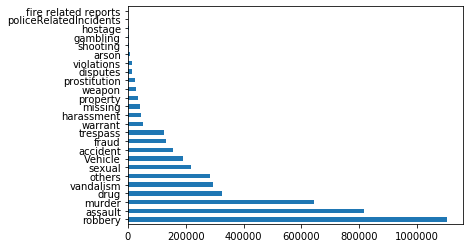

In [100]:
df['CrimeMap'].value_counts().plot(kind='barh')